#### Wirbelstromverfahren

涡流检测（Eddy Current Testing，ECT）是一种用于检测金属材料中表面和次表面缺陷的无损检测方法。该方法基于电磁感应原理，主要用于检测导电材料，尤其是金属。

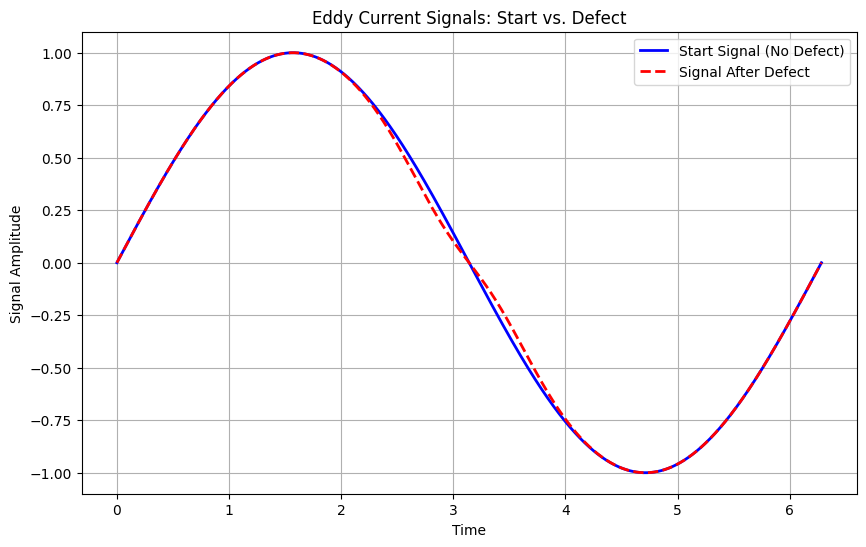

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置时间轴
t = np.linspace(0, 2*np.pi, 1000)

# 模拟开始时的信号（无缺陷，平滑正弦波）
signal_start = np.sin(t)

# 模拟感受到缺陷后的信号（幅度衰减，形状有些不规则）
signal_defect = np.sin(t) * (1 - 0.3 * np.exp(-((t - np.pi) * 2)**2))  # 中间有缺陷导致的变化

# 画图
plt.figure(figsize=(10, 6))

# 绘制原始信号（无缺陷）
plt.plot(t, signal_start, label="Start Signal (No Defect)", color="blue", linewidth=2)

# 绘制感受到缺陷后的信号
plt.plot(t, signal_defect, label="Signal After Defect", color="red", linestyle="--", linewidth=2)

# 图形美化
plt.title("Eddy Current Signals: Start vs. Defect")
plt.xlabel("Time")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.grid(True)

# 显示图像
plt.show()


要比较两个信号的差异并使用AI模型来判断异常情况，可以使用残差（residual）分析和简单的机器学习算法来识别信号之间的变化。下面是一个步骤概要，包括计算残差、训练简单的AI模型（如线性回归），并判断异常情况的示例代码。

步骤概要：
- 计算残差：计算无缺陷信号与感受到缺陷信号之间的差异。
- 使用机器学习模型：可以使用多项式回归模型来拟合正常信号，并预测其值，然后计算预测值与实际缺陷信号的差异。
- 判断异常：设定一个阈值，超过该阈值的差异可视为异常。

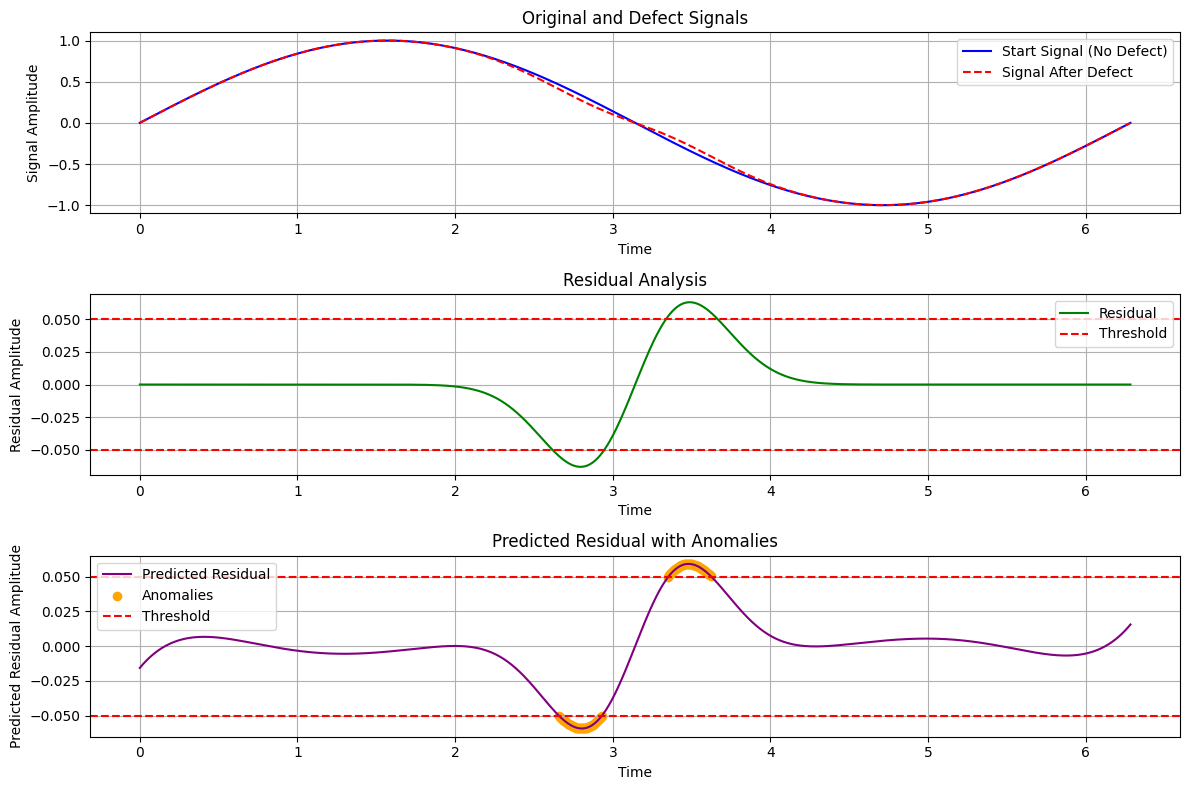

Anomalies detected at indices: [423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 533 534 535 536 537 538 539 540 541 542
 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# 设置时间轴
t = np.linspace(0, 2 * np.pi, 1000)

# 模拟开始时的信号（无缺陷，平滑正弦波）
signal_start = np.sin(t)

# 模拟感受到缺陷后的信号（幅度衰减，形状有些不规则）
signal_defect = np.sin(t) * (1 - 0.3 * np.exp(-((t - np.pi) * 2) ** 2))

# 计算残差
residual = signal_defect - signal_start

# 使用多项式回归模型拟合无缺陷信号
degree = 5  # 多项式的度数
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
t_reshaped = t.reshape(-1, 1)  # 线性回归需要二维数组
model.fit(t_reshaped, signal_start)

# 预测无缺陷信号
predicted_signal = model.predict(t_reshaped)

# 计算预测残差
predicted_residual = signal_defect - predicted_signal

# 设置新的阈值判断异常
threshold = 0.05  # 调高阈值
anomalies = np.abs(predicted_residual) > threshold

# 绘图
plt.figure(figsize=(12, 8))

# 绘制原始信号
plt.subplot(3, 1, 1)
plt.plot(t, signal_start, label="Start Signal (No Defect)", color="blue")
plt.plot(t, signal_defect, label="Signal After Defect", color="red", linestyle="--")
plt.title("Original and Defect Signals")
plt.xlabel("Time")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.grid(True)

# 绘制残差
plt.subplot(3, 1, 2)
plt.plot(t, residual, label="Residual", color="green")
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("Time")
plt.ylabel("Residual Amplitude")
plt.legend()
plt.grid(True)

# 绘制预测残差并标记异常点
plt.subplot(3, 1, 3)
plt.plot(t, predicted_residual, label="Predicted Residual", color="purple")
plt.scatter(t[anomalies], predicted_residual[anomalies], color='orange', label='Anomalies', marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.title("Predicted Residual with Anomalies")
plt.xlabel("Time")
plt.ylabel("Predicted Residual Amplitude")
plt.legend()
plt.grid(True)

# 显示图像
plt.tight_layout()
plt.show()

# 输出异常情况
anomaly_indices = np.where(anomalies)[0]
print(f"Anomalies detected at indices: {anomaly_indices}")
